# Chapter 6 Artificial Neural Network (ANN) 

### Understanding neural networks

An Artificial Neural Network (ANN) models the relationship between a set of input signals and an output signal using a model derived from our understanding of how a biological brain responds to stimuli from sensory inputs. Just as a brain uses a network of interconnected cells called **neurons** to create a massive parallel processor, ANN uses a network of artificial neurons or nodes to solve learning problems.

Broadly speaking, ANNs are versatile learners that can be applied to nearly any learning task: classification, numeric prediction, and even unsupervised pattern recognition.

### From biological to artificial neurons

The biological neurons function: incoming signals are received by the cell's **dendrites** through a biochemical process. The process allows the impulse to be weighted according to its relative importance or frequency. As the cell body begins accumulating the incoming signals, a threshold is reached at which the cell **fires** and the output signal is transmitted via an electrochemical process down the axon.

The model of a single artificial neuron can be understood in terms very similar to the biological model. As depicted in the following figure, a directed network diagram defines a relationship between the input signals received by the dendrites ($x$ variables), and the output signal ($y$ variable). Just as with the biological neuron, each dendrite's signal is weighted (w values) according to its importance—ignore, for now, how these weights are determined. The input signals are summed by the cell body and the signal is passed on according to an **activation function** denoted by $f$:

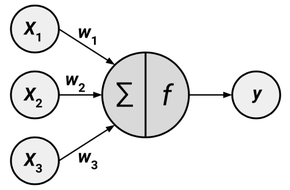

In [8]:
from PIL import Image 
myImage = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch6_ANN/ann1.jpg")
myImage1 = myImage.resize((290, 190), Image.ANTIALIAS)
display(myImage1)

A typical artificial neuron with n input dendrites can be represented by the formula that follows. The $w$ weights allow each of the n inputs (denoted by $x_{i}$) to contribute a greater or lesser amount to the sum of input signals. The net total is used by the activation function $f(x)$, and the resulting signal, $y(x)$, is the output axon:

$y(x)=f(\sum_{i=1}^{n}w_{i}x_{i})$

ANN characteristics
- An activation function, which transforms a neuron's combined input signals into a single output signal to be broadcasted further in the network
- A network topology (or architecture), which describes the number of neurons in the model as well as the number of layers and manner in which they are connected
- The training algorithm that specifies how connection weights are set in order to inhibit or excite neurons in proportion to the input signal

### Activation functions

The activation function is the mechanism by which the artificial neuron processes incoming information and passes it throughout the network. In the biological case, the activation function could be imagined as a process that involves summing the total input signal and determining whether it meets the firing threshold. If so, the neuron passes on the signal; otherwise, it does nothing. In ANN terms, this is known as a **threshold activation function**, as it results in an output signal only once a specified input threshold has been attained.

#### Sigmoid activation function (the logistic sigmoid)

Sigmoid function shares a similar step or "S" shape with the threshold activation function, the output signal is no longer binary; output values can fall anywhere in the range from 0 to 1. Additionally, the sigmoid is differentiable, which means that it is possible to calculate the derivative across the entire range of inputs. As you will learn later, this feature is crucial to create efficient ANN optimization algorithms.

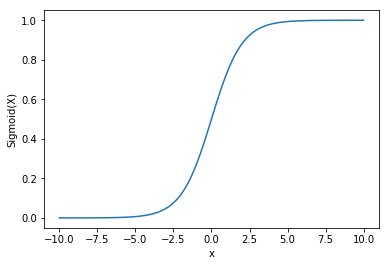

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

#### Linear 

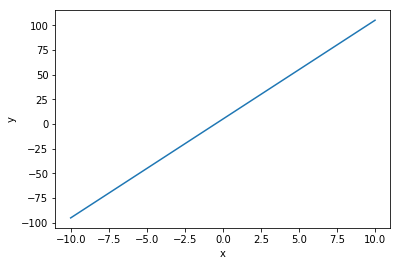

In [13]:
x = np.linspace(-10, 10, 100) 
y = 5+10*x
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
  
plt.show() 

#### Hyperbolic tangent

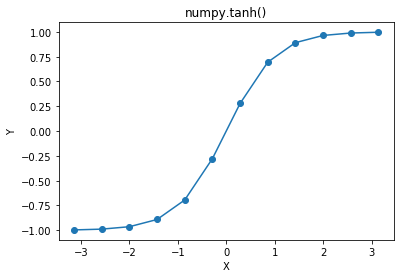

In [14]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 

# red for numpy`.tanh() 
plt.plot(in_array, out_array, marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

#### Gaussian 

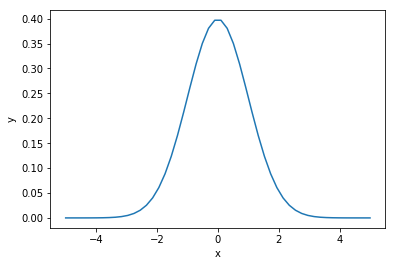

In [21]:
import scipy.stats
x = np.linspace(-5, 5) 
y = scipy.stats.norm.pdf(x, 0, 1)
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

The primary detail that differentiates these activation functions is the output signal range. Typically, this is one of (0, 1), (-1, +1), or (-inf, +inf). The choice of activation function biases the neural network such that it may fit certain types of data more appropriately, allowing the construction of specialized neural networks. For instance, a linear activation function results in a neural network very similar to a linear regression model, while a Gaussian activation function results in a model called a **Radial Basis Function (RBF) network**. Each of these has strengths better suited for certain learning tasks and not others.

It's important to recognize that for many of the activation functions, the range of input values that affect the output signal is relatively narrow. For example, in the case of sigmoid, the output signal is always nearly 0 or 1 for an input signal below -5 or above +5, respectively. The compression of signal in this way results in a saturated signal at the high and low ends of very dynamic inputs.  Because this essentially squeezes the input values into a smaller range of outputs, activation functions like the sigmoid are sometimes called **squashing functions**.

The solution to the squashing problem is to transform all neural network inputs such that the features' values fall within a small range around 0. Typically, this involves standardizing or normalizing the features. A side benefit is that the model may also be faster to train, since the algorithm can iterate more quickly through the actionable range of input values.

### Network topology

The ability of a neural network to learn is rooted in its topology, or the patterns and structures of interconnected neurons.
- The number of layers
- Whether information in the network is allowed to travel backward
- The number of nodes within each layer of the network

Generally, larger and more complex networks are capable of identifying more subtle patterns and complex decision boundaries. 

#### The number of layers

The figure that follows illustrates the topology of a very simple network. A set of neurons called input nodes receives unprocessed signals directly from the input data. Each input node is responsible for processing a single feature in the dataset; the feature's value will be transformed by the corresponding node's activation function. The signals sent by the input nodes are received by the output node, which uses its own activation function to generate a final prediction (denoted here as $p$).

he input and output nodes are arranged in groups known as layers. Because the input nodes process the incoming data exactly as it is received, the network has only one set of connection weights (labeled here as $w1, w2$, and $w3$). It is therefore termed a **single-layer network**. 

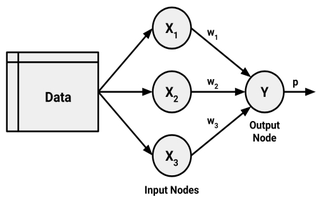

In [25]:
from PIL import Image 
myImage = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch6_ANN/ann2.jpg")
myImage2 = myImage.resize((320, 200), Image.ANTIALIAS)
display(myImage2)

A **multilayer network** adds one or more **hidden layers** that process the signals from the input nodes prior to it reaching the output node. Most multilayer networks are **fully connected**, which means that every node in one layer is connected to every node in the next layer, but this is not required.

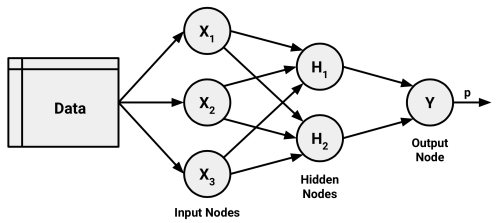

In [28]:
myImage3 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch6_ANN/ann3.jpg")
display(myImage3)

 #### The direction of information travel

in the prior examples, arrowheads were used to indicate signals traveling in only one direction. Networks in which the input signal is fed continuously in one direction from connection to connection until it reaches the output layer are called **feedforward networks**.

the number of levels and nodes at each level can be varied, multiple outcomes can be modeled simultaneously, or multiple hidden layers can be applied. A neural network with multiple hidden layers is called a **Deep Neural Network (DNN)** and the practice of training such network is sometimes referred to as **deep learning**. The multilayer feedforward networksometimes called the **Multilayer Perceptron (MLP)**, is the de facto standard ANN topology.

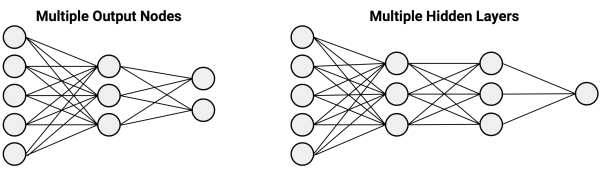

In [29]:
myImage4 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch6_ANN/ann4.jpg")
display(myImage4)

In contrast, a r**ecurrent network (or feedback network)** allows signals to travel in both directions using loops. This property, which more closely mirrors how a biological neural network works, allows extremely complex patterns to be learned. The addition of a short-term memory, or delay, increases the power of recurrent networks immensely. Notably, this includes the capability to understand the sequences of events over a period of time. This could be used for stock market prediction, speech comprehension, or weather forecasting. A simple recurrent network is depicted as follows:

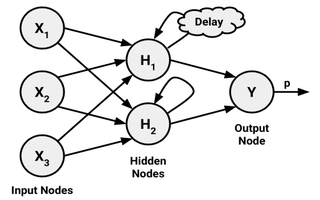

In [31]:
myImage5 = Image.open("/Users/jiaoyu/Documents/Ph.D/teaching/Machine_learning_with_R/ch6_ANN/ann5.jpg")
myImage5 = myImage5.resize((320, 200), Image.ANTIALIAS)
display(myImage5)

#### The number of nodes in each layer

Similarly, the number of output nodes is predetermined by the number of outcomes to be modeled or the number of class levels in the outcome. However, the number of hidden nodes is left to the user to decide prior to training the model.

Unfortunately, there is no reliable rule to determine the number of neurons in the hidden layer. The appropriate number depends on the number of input nodes, the amount of training data, the amount of noisy data, and the complexity of the learning task, among many other factors.A greater number of neurons will result in a model that more closely mirrors the training data, but this runs a risk of overfitting. 

### Training neural networks with backpropagation

The algorithm, which used a strategy of back-propagating errors, is now known simply as backpropagation.In its most general form, the backpropagation algorithm iterates through many cycles of two processes. Each cycle is known as an epoch. Because the network contains no a priori (existing) knowledge, the starting weights are typically set at random. Then, the algorithm iterates through the processes, until a stopping criterion is reached. Each epoch in the backpropagation algorithm includes:


- A forward phase in which the neurons are activated in sequence from the input layer to the output layer, applying each neuron's weights and activation function along the way. Upon reaching the final layer, an output signal is produced.
- A backward phase in which the network's output signal resulting from the forward phase is compared to the true target value in the training data. The difference between the network's output signal and the true value results in an error that is propagated backwards in the network to modify the connection weights between neurons and reduce future errors.

Over time, the network uses the information sent backward to reduce the total error of the network. Yet one question remains: because the relationship between each neuron's inputs and outputs is complex, how does the algorithm determine how much a weight should be changed? The answer to this question involves a technique called **gradient descent**. Conceptually, it works similarly to how an explorer trapped in the jungle might find a path to water. By examining the terrain and continually walking in the direction with the greatest downward slope, the explorer will eventually reach the lowest valley, which is likely to be a riverbed.

In a similar process, the backpropagation algorithm uses the derivative of each neuron's activation function to identify the gradient in the direction of each of the incoming weights—hence the importance of having a differentiable activation function. The gradient suggests how steeply the error will be reduced or increased for a change in the weight. The algorithm will attempt to change the weights that result in the greatest reduction in error by an amount known as the learning rate. The greater the **learning rate**, the faster the algorithm will attempt to descend down the gradients, which could reduce the training time at the risk of overshooting the valley.